In [6]:
#Multiple Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
data=pd.read_csv('economic_index.csv')

In [3]:
data

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


In [9]:
data.drop(columns=['Unnamed: 0','year','month'],inplace=True)

In [10]:
data

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


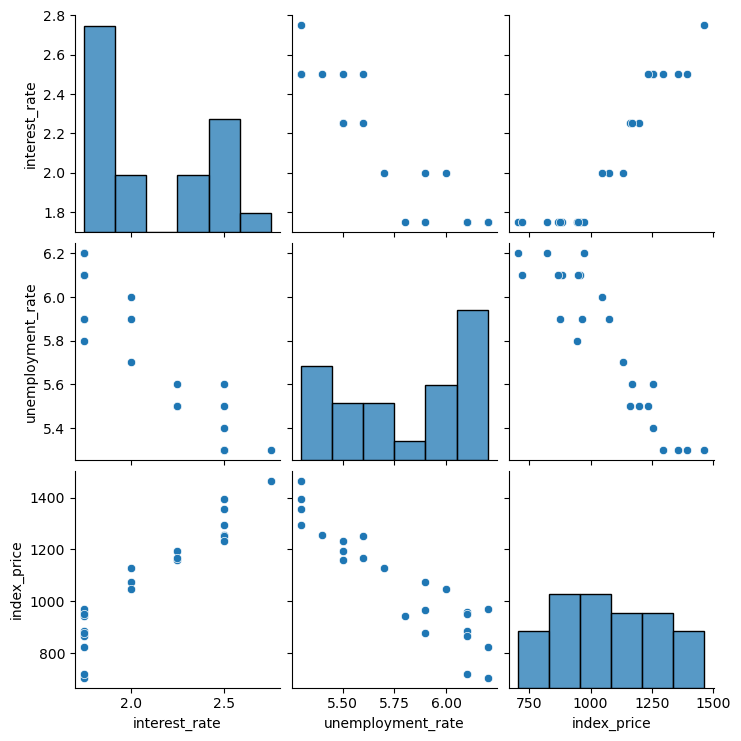

In [11]:
sb.pairplot(data)

In [13]:
data.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


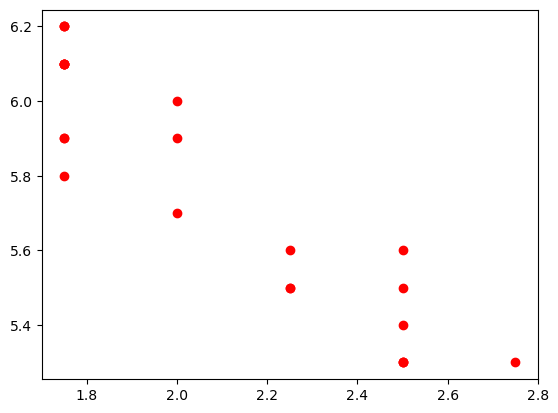

In [16]:
#visualizing data points
plt.scatter(data['interest_rate'],data['unemployment_rate'],color='r')

In [17]:
#independent features and independent features
X=data[['interest_rate','unemployment_rate']]
y=data['index_price']

In [18]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

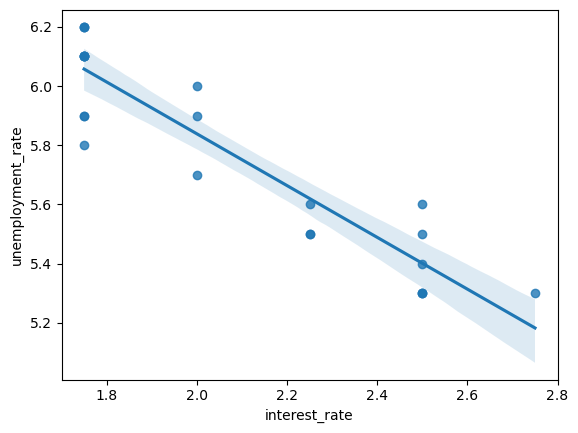

In [24]:
import seaborn as sb

sb.regplot(x='interest_rate', y='unemployment_rate', data=data)


In [25]:
from  sklearn.preprocessing import StandardScaler


In [26]:
scaler=StandardScaler()

In [27]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [29]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [30]:
regression.fit(X_train,y_train)

LinearRegression()

In [31]:
from sklearn.model_selection import cross_val_score #cross validation

In [34]:
validation_score=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [35]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [36]:
#predict
y_pred=regression.predict(X_test)

In [37]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [38]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [39]:
mse=mean_squared_error(y_test,y_pred)

In [40]:
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)


In [41]:
mae,mse,rmse

(59.93578152323558, 5793.762887712583, 76.11677139574815)

In [42]:
#r2 score
score=r2_score(y_test,y_pred)
score

0.8278978091457141

In [45]:
adj_r_squared = 1 - (1 - score) * ((len(y_test)) - 1) / (len(y_test) - X_test.shape[1] - 1)

In [48]:
adj_r_squared

0.7131630152428567

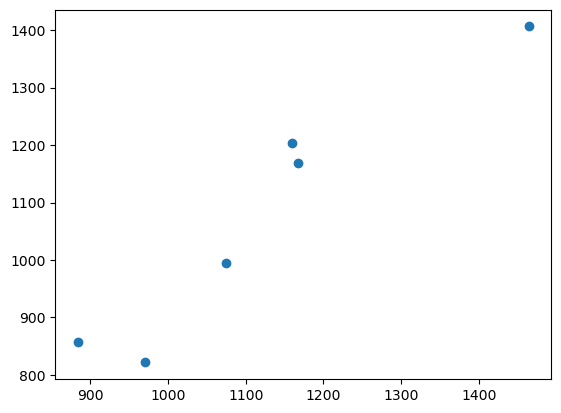

In [49]:
#assumptions
plt.scatter(y_test,y_pred)

In [50]:
residuals=y_test-y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

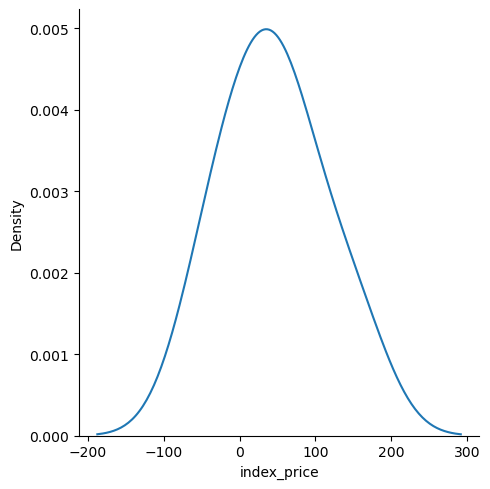

In [52]:
sb.displot(residuals,kind='kde'
          )

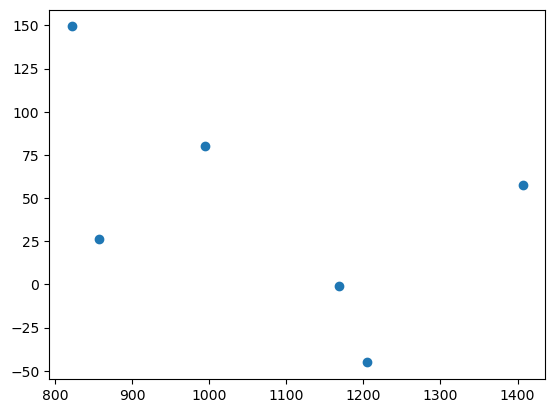

In [53]:
#scatter wrt prediction and residuals
plt.scatter(y_pred,residuals)

In [56]:
#ols
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()


In [57]:
model.summary()

C:\Users\ariha\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 02 Oct 2024   Prob (F-statistic):                       0.754
Time:                        20:32:38   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
regression.coef_,regression.intercept_

(array([  88.27275507, -116.25716066]), 1053.4444444444443)